# Gaussian Components
How to extract the background-subtracted Gaussian components of peaks, plot them, and display table with values


In [6]:
import pandas as pd
from nasagamma import spectrum as sp
from nasagamma import peaksearch as ps
from nasagamma import peakfit as pf
import matplotlib.pyplot as plt
import numpy as np

The next piece of code isidentical to "4.energy-calibration"

In [7]:
file = "data/10-23-2020-800-3.csv"
# the columns are not in a 'nice' format (blank spaces)
# so, rename them
dict0 = {" Energy (keV)" : "Energy", " Counts":"Counts"}
dfi = pd.read_csv(file, nrows=5)
df = pd.read_csv(file, header=6)
df = df.rename(columns=dict0)

spect = sp.Spectrum(counts=df.Counts)
fwhm_at_0 = 1.0
ref_x = 1315
ref_fwhm = 42
search = ps.PeakSearch(spect, ref_x, ref_fwhm, fwhm_at_0, min_snr=4)

xrange = [1250, 1600]
bkg = "poly2"
fit = pf.PeakFit(search, xrange=xrange, bkg=bkg)

# energy calibration
ch = df.Channel.to_numpy(dtype=int) - 1
peak_info = fit.peak_info
mean_values = [peak_info[0]['mean1'], peak_info[1]['mean2']]
mean_values.insert(0,0) # add the origin
erg = [0, 1173.2, 1332.5] # in keV
pred_erg, efit = pf.ecalibration(mean_vals=mean_values, erg=erg, channels=ch, n=1,
                                plot=False)
pred_erg[0] = 0 # because negative entry

spect2 = sp.Spectrum(counts=df.Counts, energies=pred_erg, e_units="keV")


Working with channel numbers
Found 2 peak(s) within range [1250, 1600]
Fit succeeded.


Find peaks

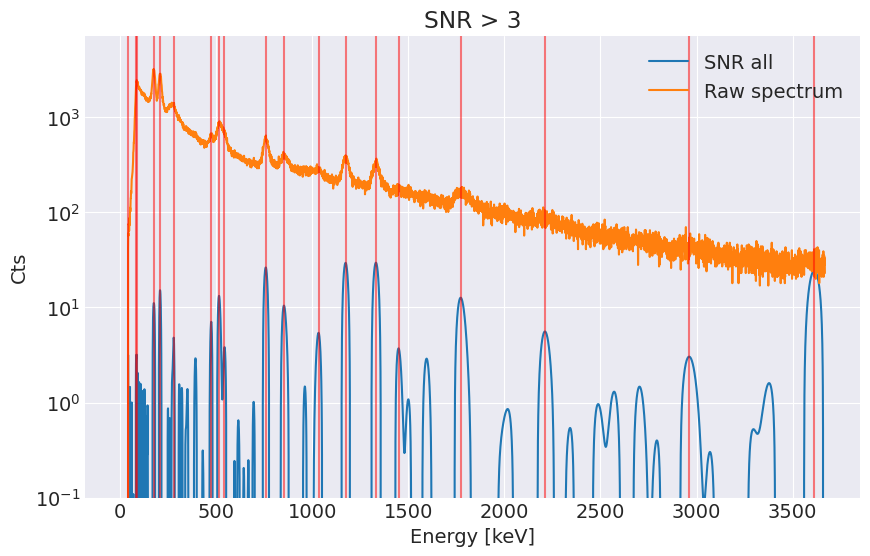

In [8]:
search2 = ps.PeakSearch(spect2, ref_x, ref_fwhm, fwhm_at_0, min_snr=3)
search2.plot_peaks(yscale="log")

Create 2 lists of peak ranges and background functions. This was chosen one by one using the PeakFit class (not shown here, but same procedure as above)

In [9]:
bkg_lst = ["poly2", "poly2", "poly1", "poly2", "poly1"]
xrange_lst = [[140, 320], [440, 610], [700, 950], [1110, 1550],
              [1670, 1950]]

Create a list of PeakFit objects based on the lists created above using the auto_scan function. Of course, this can be done manually too, but the auto_scan function is in the process of figuring out the best ranges and backgrounds automatically.

In [10]:
fit_lst = pf.auto_scan(search2, xlst=xrange_lst, bkglst=bkg_lst)

Working with energy values
Found 3 peak(s) within range [140, 320]
Fit succeeded.
Working with energy values
Found 3 peak(s) within range [440, 610]
Fit succeeded.
Working with energy values
Found 2 peak(s) within range [700, 950]
Fit succeeded.
Working with energy values
Found 3 peak(s) within range [1110, 1550]
Fit succeeded.
Working with energy values
Found 1 peak(s) within range [1670, 1950]
Fit succeeded.


Extract and plot the Gaussian components only, which are the net areas of the peaks

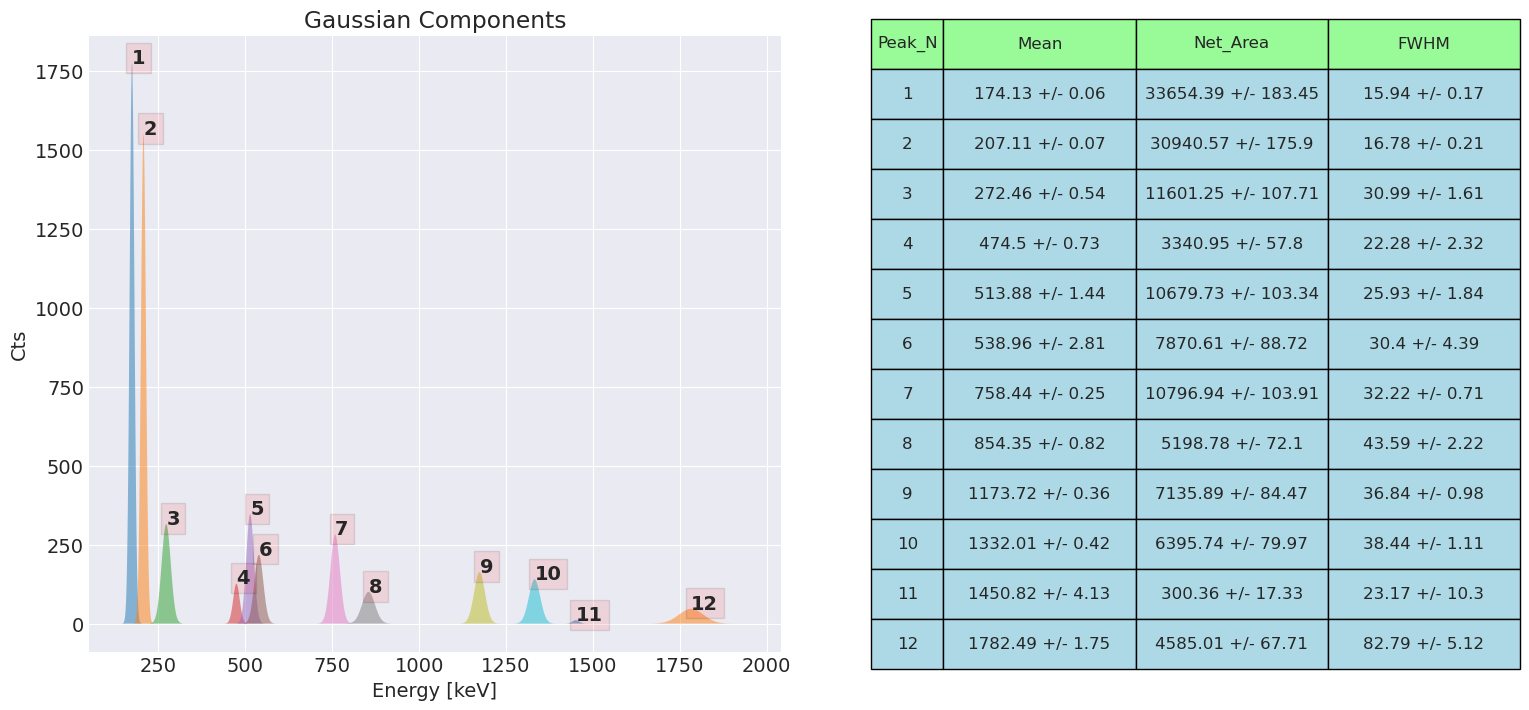

In [11]:
# plot gaussian components
gc2 = pf.GaussianComponents(fit_obj_lst=fit_lst)
gc2.plot_gauss(plot_type="full", table_scale=[1,3])